In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
import pickle
import os

In [4]:
data_dir = r'C:\Users\a0105\Desktop\DSC\ddd\preprocessing/'

filenames = os.listdir(data_dir)
print(filenames)

['feed.rds', 'usbeer_merge.pkl', '가축사육현황merge.pkl', '경제성장률merge.pkl', '관측정보_merge.pkl', '수입현황merge.pkl', '축산물_공휴일.pkl', '축산물_시계열 데이터로 변환(전국).pkl']


In [5]:
with open(data_dir+'usbeer_merge.pkl', 'rb') as f:
    usbeef = pickle.load(f)

with open(data_dir+'가축사육현황merge.pkl', 'rb') as f:
    livestock = pickle.load(f)
    
with open(data_dir+'경제성장률merge.pkl', 'rb') as f:
    economic = pickle.load(f)
    
with open(data_dir+'관측정보_merge.pkl', 'rb') as f:
    weather = pickle.load(f)

with open(data_dir+'수입현황merge.pkl', 'rb') as f:
    import_df = pickle.load(f)
    
with open(data_dir+'축산물_공휴일.pkl', 'rb') as f:
    holiday = pickle.load(f)
    
with open(data_dir+'축산물_시계열 데이터로 변환(전국).pkl', 'rb') as f:
    price_ts = pickle.load(f)

In [6]:
print(usbeef.shape)
print(livestock.shape)
print(economic.shape)
print(weather.shape)
print(import_df.shape)
print(holiday.shape)
print(price_ts.shape)

(298, 3)
(298, 21)
(298, 16)
(298, 11)
(298, 8)
(298, 7)
(298, 5)


In [7]:
# livestock 주간날짜 칼럼 -> datetime형태로 바꿔주기
livestock['주간날짜'] = pd.to_datetime(livestock['주간날짜'])

### usbeef 가격 데이터+ 한우가격(y값)

In [8]:
usbeef.head
print(usbeef.columns)

Index(['주간날짜', '한우 평균경매 금액_주간평균', 'price'], dtype='object')


In [9]:
# price -> 생산량_주간평균으로 대체
usbeef = usbeef.rename(columns={'price':'미국소_생산량(가격화한값)'})

In [10]:
del usbeef['한우 평균경매 금액_주간평균']

In [11]:
# 한우 평균경매금액_주간평균 소숫점 2째자리까지만 남기기
usbeef_df = usbeef.copy()
usbeef_df.head(2)

,주간날짜,미국소_생산량(가격화한값)
0,2013-01-06,226130.0
1,2013-01-13,226130.0


### livestock(가축사육현황) 데이터 + 한우가격(y값)

In [12]:
# 모든 칼럼 다 보기
pd.options.display.max_columns = 22
livestock.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),분기,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-06,13875.600000,3044.800000,2013,1
1,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-13,13213.333333,2984.000000,2013,1
2,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-20,12588.833333,2904.000000,2013,1
3,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-27,12323.833333,2959.666667,2013,1
4,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-02-03,12325.166667,2862.833333,2013,2


In [13]:
# 필요한 칼럼
columns = ['주간날짜','번식우 아닌 소 중 1세 미만(암,수) 제외','1~2세(모든 소)',
          '한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균']

livestock_df = livestock[columns]
livestock_df['한우 평균경매 금액_주간평균'] = livestock_df['한우 평균경매 금액_주간평균'].round(2)
livestock_df['돼지 탕박 경매 금액_주간평균'] = livestock_df['돼지 탕박 경매 금액_주간평균'].round(2)


C:\Users\a0105\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\a0105\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
livestock_df.head()

,주간날짜,"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균
0,2013-01-06,520,888,13875.60,3044.80
1,2013-01-13,520,888,13213.33,2984.00
2,2013-01-20,520,888,12588.83,2904.00
3,2013-01-27,520,888,12323.83,2959.67
4,2013-02-03,520,888,12325.17,2862.83


### economic(경제성장률) 데이터 + 한우가격(y값)

In [15]:
economic.head()

,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%),주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-06,13875.600000,3044.800000,2013,1
1,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-13,13213.333333,2984.000000,2013,1
2,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-20,12588.833333,2904.000000,2013,1
3,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-27,12323.833333,2959.666667,2013,1
4,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-02-03,12325.166667,2862.833333,2013,2


- <소>
    - [양의 상관관계]
        * 국내총생산 0.58 
        * 1인당 gdp 0.55  
        * 총인구 0.79 
        * 소비자물가지수 0.71  
        * 인터넷이용률 0.77  
        * 돼지탕박가격 0.46

    - [음의 상관관계]
        * gdp성장률 -0.59  
        * 수입 -0.53  


- <돼지>- 소와의 가격관계
    - [양의 상관관계]
        * 한우가격 0.46

In [16]:
# 필요한 칼럼 
columns = ['주간날짜','수출 (100만달러)','수입 (100만달러)','소비자물가지수 (2010=100)']

economic_df = economic[columns]
economic_df.head(2)

,주간날짜,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100)
0,2013-01-06,559632,515586,98
1,2013-01-13,559632,515586,98


### import_df(수입소고기 수입현황) 데이터 + 한우가격(y값)

In [17]:
import_df.columns

Index(['주간날짜', '한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균', 'year', 'month',
       'frozen', 'refrigeration', 'total'],
      dtype='object')

In [18]:
# 필요한 칼럼 
columns = ['주간날짜','total']

import_df = import_df[columns]
import_df.head(2)

,주간날짜,total
0,2013-01-06,28623
1,2013-01-13,28623


In [19]:
# total 칼럼명 바꾸기
import_df = import_df.rename(columns={'total':'수입소고기_총량'})
import_df.head(2)

,주간날짜,수입소고기_총량
0,2013-01-06,28623
1,2013-01-13,28623


---

### weather(날씨 관측 데이터) - EDA 더 필요!?

In [20]:
# year, month 칼럼제거
weather_df = weather.drop(['year','month'], axis=1)
weather_df.head(2)

,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,13875.600000,3044.8,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,13213.333333,2984.0,1.4,-2.2,6.1,0.0,30.0,49.6


In [21]:
weather_df = weather_df.drop(['한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균'],axis=1)
weather_df.head(2)

,주간날짜,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,1.4,-2.2,6.1,0.0,30.0,49.6


날씨 데이터가 폐사의 여부를 알기 위해 사용하고자 수집한 데이터이지만 가축관리에 날씨는 영향을 미치기 때문에 해당 값 자체를 변수로 사용하여 모델링에 적용해보고자함.

---

## 데이터 병합

- 우선 더 EDA가 진행되지 않은 관측데이터(weather_df변수)인 상태에서 병합해봄
- 향후 관측데아터의 추가적인 EDA 실시 후 feature selection 필요

In [22]:
from functools import reduce

In [23]:
dfs = [usbeef_df, livestock_df, economic_df, import_df,weather_df]

df_final = reduce(lambda left, right: pd.merge(left, right, on='주간날짜'), dfs)

In [24]:
df_final.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4


# 상관관계

C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


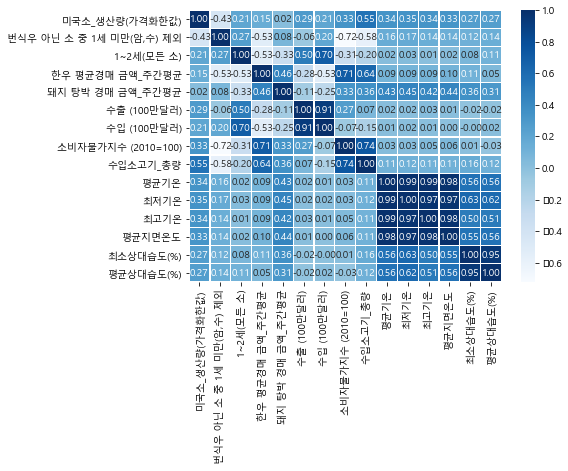

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

corr_data = df_final.drop(["주간날짜"], axis=1)
corr = corr_data.corr()

plt.figure(figsize=(7,5))

sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.2, cmap='Blues')

* '번식우 아닌 소 중 1세 미만(암, 수)제외' & '1~2세(모든 소)' 변수는 각각 -0.53으로 음의 상관관계를 보이고 있음
* '미국소_생산량(가격화한값)' 변수는 0.15로 약한 양의 상관관계를 보이고 있음.
* '돼지 탕박 경매 금액_주간평균' 0.46으로 양의 상관관계를 보이고 있음.
* '수입(100만달러)' 변수는 -0.53으로 음의 상관관계를 보이고 있지만 수입소고기_총량은 0.64로 양의 상관관계를 보이고 있음.
* 기온 관련 변수 모두 매우 약한 상관관계를 보이고 있고 최소상대습도가 0.11로 그나마 높음. 

In [26]:
y = df_final['한우 평균경매 금액_주간평균']

In [27]:
x = df_final.drop(['주간날짜','한우 평균경매 금액_주간평균'],axis=1)

In [28]:
x.dtypes

미국소_생산량(가격화한값)              float64
번식우 아닌 소 중 1세 미만(암,수) 제외      int32
1~2세(모든 소)                    int32
돼지 탕박 경매 금액_주간평균            float64
수출 (100만달러)                   int32
수입 (100만달러)                   int32
소비자물가지수 (2010=100)            int32
수입소고기_총량                      int64
평균기온                        float64
최저기온                        float64
최고기온                        float64
평균지면온도                      float64
최소상대습도(%)                   float64
평균상대습도(%)                   float64
dtype: object

In [29]:
df_final['미국소_생산량(가격화한값)'] = df_final['미국소_생산량(가격화한값)'].astype('int32') 

In [30]:
df_final.dtypes

주간날짜                        datetime64[ns]
미국소_생산량(가격화한값)                       int32
번식우 아닌 소 중 1세 미만(암,수) 제외             int32
1~2세(모든 소)                           int32
한우 평균경매 금액_주간평균                    float64
돼지 탕박 경매 금액_주간평균                   float64
수출 (100만달러)                          int32
수입 (100만달러)                          int32
소비자물가지수 (2010=100)                   int32
수입소고기_총량                             int64
평균기온                               float64
최저기온                               float64
최고기온                               float64
평균지면온도                             float64
최소상대습도(%)                          float64
평균상대습도(%)                          float64
dtype: object

In [31]:
del df_final['주간날짜']

In [32]:
from sklearn import preprocessing

features = ['미국소_생산량(가격화한값)', '번식우 아닌 소 중 1세 미만(암,수) 제외', '1~2세(모든 소)','돼지 탕박 경매 금액_주간평균', '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)','수입소고기_총량','평균기온','최소상대습도(%)']

# 이상치에 민감하지 않은 robustsclaer적용 (돼지탕박경매금액_주간평균에 이상치가 포함되어 있었기 때문)
robust_scaler = preprocessing.RobustScaler()
np_scaled_data = robust_scaler.fit_transform(df_final[features])
scaled_data = df_final.copy()


In [33]:
scaled_data

,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,226130,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,226130,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6
2,226130,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9
3,226130,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0
4,187340,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,242960,486,887,16835.00,5305.00,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4
294,242960,486,887,17555.00,5207.50,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4
295,215750,486,887,18369.00,5548.00,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1
296,215750,486,887,18757.00,5754.00,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3


In [34]:
scaled_data[features] = np_scaled_data 

In [35]:
from sklearn.model_selection import KFold
import xgboost

kf = KFold(n_splits=5,shuffle=True)
print(type(kf))

fold_idx = 1

for train_idx, test_idx in kf.split(scaled_data):
    
    train_d, test_d = scaled_data.iloc[train_idx], scaled_data.iloc[test_idx]
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    
    xgb =xgboost.XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 5)
    xgb.fit(train_x,train_y)
    
    mean_accuracy = xgb.score(test_x,test_y)
    print('mean_accuracy = {}'.format(mean_accuracy))

<class 'sklearn.model_selection._split.KFold'>
mean_accuracy = 0.9352177912639865
mean_accuracy = 0.8946414180468029
mean_accuracy = 0.8972843435437371
mean_accuracy = 0.8601980676396863
mean_accuracy = 0.8747081710084605


In [36]:
from sklearn.ensemble import RandomForestRegressor
kf = KFold(n_splits=5,shuffle=True)
print(type(kf))

fold_idx = 1

for train_idx, test_idx in kf.split(scaled_data):
    
    train_d, test_d = scaled_data.iloc[train_idx], scaled_data.iloc[test_idx]
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    
    rf =RandomForestRegressor(oob_score=True,n_estimators=130, max_features='sqrt')
    rf.fit(train_x,train_y)
    
    mean_accuracy = rf.score(test_x,test_y)
    print('mean_accuracy = {}'.format(mean_accuracy))

<class 'sklearn.model_selection._split.KFold'>
mean_accuracy = 0.9400130274106722
mean_accuracy = 0.9105997219396385
mean_accuracy = 0.8932477808743404
mean_accuracy = 0.9521768543938797
mean_accuracy = 0.8195355572684174


In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_pred = xgb.predict(test_x)
mse = mean_squared_error(test_y, xgb_pred)
r2 = r2_score(test_y, xgb_pred)
mae = mean_absolute_error(test_y, xgb_pred)
mean_accuracy = xgb.score(test_x,test_y)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  242.00444762099272
R2 score:  0.9888123670300936
Mean absolute error:  106.27004303495757
accuracy:  0.9888123670300936


In [38]:
xgb_pred = xgb.predict(train_x)
mse = mean_squared_error(train_y, xgb_pred)
mae = mean_absolute_error(train_y, xgb_pred)
mean_accuracy = xgb.score(train_x,train_y)

print('Root mean squared error: ', np.sqrt(mse))
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  398.0499272625018
Mean absolute error:  152.76959777065898
accuracy:  0.9692452165789095


* train set에 적용된 모델의 정확도는 0.984 test set에 적용된 모델의 정확도는 0.980, R2은  0.980으로 정확도와 설명력이 높음 

In [39]:
rf_pred = rf.predict(test_x)
mse = mean_squared_error(test_y, rf_pred)
r2 = r2_score(test_y, rf_pred)
mae = mean_absolute_error(test_y, rf_pred)
mean_accuracy = rf.score(test_x,test_y)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  971.9637432949612
R2 score:  0.8195355572684174
Mean absolute error:  577.37436375489
accuracy:  0.8195355572684174


* 정확도, r2 socre, mse,m mae를 비교하였을 때 xgboostm의 성능이 더 좋음

## 중요변수 도출 

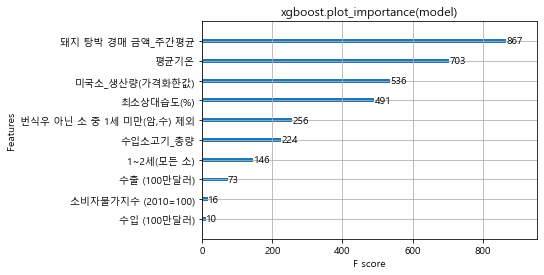

In [40]:
xgboost.plot_importance(xgb)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [41]:
# xgboost.plot_importance(xgb, importance_type="cover")
# plt.title('xgboost.plot_importance(model, importance_type="cover")')
# plt.show()

# xgboost.plot_importance(xgb, importance_type="gain")
# plt.title('xgboost.plot_importance(model, importance_type="gain")')
# plt.show()

In [42]:
features.remove('돼지 탕박 경매 금액_주간평균')

In [43]:
from sklearn.model_selection import KFold
import xgboost

kf = KFold(n_splits=5,shuffle=True)
print(type(kf))

fold_idx = 1

for train_idx, test_idx in kf.split(scaled_data):
    
    train_d, test_d = scaled_data.iloc[train_idx], scaled_data.iloc[test_idx]
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    
    xgb =xgboost.XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 5)
    xgb.fit(train_x,train_y)
    
    mean_accuracy = xgb.score(test_x,test_y)
    print('mean_accuracy = {}'.format(mean_accuracy))

<class 'sklearn.model_selection._split.KFold'>
mean_accuracy = 0.8401139779160498
mean_accuracy = 0.8995087753898255
mean_accuracy = 0.8263113908782695
mean_accuracy = 0.8908819195954916
mean_accuracy = 0.9174316874693657


In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_pred = xgb.predict(test_x)
mse = mean_squared_error(test_y, xgb_pred)
r2 = r2_score(test_y, xgb_pred)
mae = mean_absolute_error(test_y, xgb_pred)
mean_accuracy = xgb.score(test_x,test_y)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  656.2910548883647
R2 score:  0.9174316874693657
Mean absolute error:  471.95762976694914
accuracy:  0.9174316874693657


In [45]:
xgb_pred = xgb.predict(train_x)
mse = mean_squared_error(train_y, xgb_pred)
r2 = r2_score(train_y, xgb_pred)
mae = mean_absolute_error(train_y, xgb_pred)
mean_accuracy = xgb.score(train_x,train_y)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  85.8889139246746
R2 score:  0.9985693567022491
Mean absolute error:  59.691229896705
accuracy:  0.9985693567022491


* 돼지탕박경매금액을 빼고한 것 성능이 낮진 않으나 오버피팅되고 있음. 튜닝필요

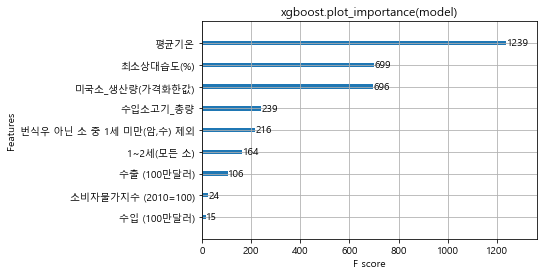

In [46]:
xgboost.plot_importance(xgb)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [47]:
# xgboost.plot_importance(xgb, importance_type="cover")
# plt.title('xgboost.plot_importance(model, importance_type="cover")')
# plt.show()